In [26]:
'''Import pertinent packages'''
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [27]:
'''Import  and refine data'''

df_data = pd.read_csv('WDI_csv/WDIData.csv')
df_country = pd.read_csv('WDI_csv/WDICountry.csv')
df_data = df_data.iloc[:,:-1]
df_data_columns = df_data.columns

In [28]:
'''Create dataframes of countries according to GNI brackets'''

GNI_list = ['Low income', 'Lower middle income', 'Upper middle income', 'High income']
income_group = []
for income in GNI_list:
    income_group.append(df_country[df_country['Income Group'] == income])
    
l_income, lm_income, um_income,h_income = income_group

In [29]:
'''Create lists of unique country codes according to GNI brackets'''

income_code_list = []
for bracket in income_group:
    income_code_list.append(bracket['Country Code'])
l_list,lm_list,um_list,h_list = income_code_list

In [30]:
'''Investigate the number of unique indicator codes and country codes to ensure correspondence of code to country'''

ind_code_list = df_data['Indicator Code'].unique()
country_code_list = df_data['Country Code'].unique()
indicator_name_list = df_data['Indicator Name'].unique()
df_country_ind_code = df_data[['Indicator Name', 'Indicator Code']][:1429]

In [31]:
'''A Template for formatting WDI_Data on the X-axis according to Year'''

data_year_list = []
for year in df_data_columns[4:]:
    data_year_list.append(year)

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

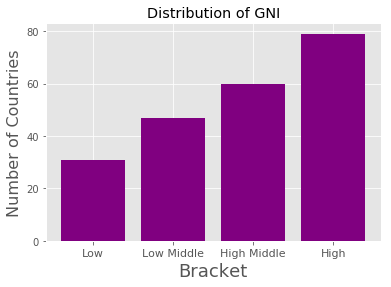

In [32]:
'''Create a boxplot displaying the relative distribution of countries according to income bracket'''

wealth_dist_bar_y = []
for item in income_code_list:
    wealth_dist_bar_y.append(len(item))
wealth_dist_bar_x = ['Low', 'Low Middle', 'High Middle', 'High']
fig, ax = plt.subplots()
ax.bar(wealth_dist_bar_x, wealth_dist_bar_y, color='purple')
ax.set_title('Distribution of GNI')
ax.set_ylabel('Number of Countries', size=16)
ax.set_xlabel('Bracket', size=18)
plt.yticks(np.arange(0,81,step=20))
plt.xticks(size=11)

In [33]:
'''A function for finding the unique values according to a specified column and keyword'''

def unique_df_keyword(df, search_col, keyword):
    '''A relative keyword search of a specified column.
    
    Input: dataframe of interest, column to search, values or code to search for.
    Returns: a search of the given column for the value specified
    '''
    return df_data.loc[df_data[str(search_col)].str.find(keyword) == 0][str(search_col)].unique()

In [34]:
'''Creating select lists from power indicators'''

elec_codes = unique_df_keyword(df_data, 'Indicator Code', 'EG')
elec_names = list(df_data['Indicator Name'][df_data['Indicator Code'].isin(elec_codes)].unique())

#select 8 of the distinct codes related to power and put it in a list
pwr_names = ['Access to clean fuels and technologies for cooking (% of population)','Access to electricity (% of population)',
            'Electric power consumption (kWh per capita)','Electricity production from renewable sources, excluding hydroelectric (kWh)',
            'Energy intensity level of primary energy (MJ/$2011 PPP GDP)','Energy use (kg of oil equivalent per capita)',
            'GDP per unit of energy use (PPP $ per kg of oil equivalent)','Electricity production from nuclear sources (% of total)']
pwr_codes = list(df_data['Indicator Code'][df_data['Indicator Name'].isin(pwr_names)].unique())

In [35]:
'''Cumulative Line Plots for GNI Brackets Given Indicator Code'''

def income_mean_plots_from_indicator(indicator_code):
    '''Creates a list of pertinent codes to send into a cumulative plot of means according to GNI bracket over time.
    
    input: indicator code
    output: feeds the mean for each income bracket for each year into the mean plot accumulator.
    '''
    
    ind_df = df_data[df_data['Indicator Code'] == indicator_code]
    title = ind_df["Indicator Name"].iloc[0]
    dni_list = [l_list, lm_list, um_list, h_list]
    
    mean_list = []
    for bracket in dni_list:
        income_lvl = ind_df[ind_df['Country Code'].isin(bracket)]
        mean_list.append(income_lvl.mean())
    
    WDI_list_mean_plot(mean_list,title)
        
        
def WDI_list_mean_plot(in_df_list, title):
    ''' Affixes GNI bracket category for each mean and feeds it into the cumulative plotter'''
    
    fig, ax = plt.subplots(figsize = (15,6))
    legend = ['Low',"Low Middle", "Upper Middle", "High"]
    
    for num in range(0,len(in_df_list)):
        WDI_mean_plot(legend[num],in_df_list[num], title, ax=ax)
        

def WDI_mean_plot(label, indicator, title, ax):
    '''Makes a cumulative plot over time (1960-2019) 

    Args:
        param1: label
        param2: y axis information
        param3: title

    Returns:
        A cumulative plot
    '''
    
    x_elec_access = data_year_list
    y_elec_access = indicator
        
    
    ax.plot(x_elec_access, y_elec_access, label = label)
    ax.set_title(str(title), fontweight='bold')
#     ax.set_ylabel(yaxis)
    ax.set_xlabel('Year')
    ax.legend(loc='center left',prop={'size':15})
#     ax.legend(bbox_to_anchor = (0.09,.3))
#     ax.set_xlim()
    plt.xticks(ticks = np.arange(0,60,5))
    plt.xlim(30,55)
#     plt.gcf().autofmt_xdate()
    return 

In [36]:
# sns.set(font_scale=2)
# for code in pwr_codes:
#     income_mean_plots_from_indicator(code)

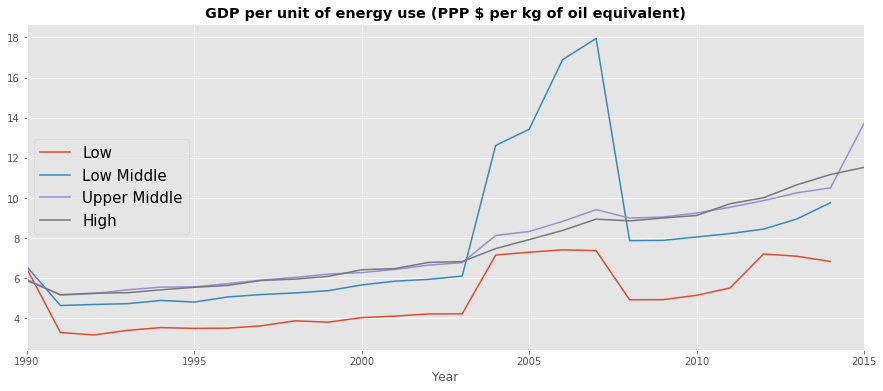

In [37]:
'''Create a plot of a specific power code'''

income_mean_plots_from_indicator(pwr_codes[-1])

In [38]:
def income_boxplot(df, indicator_code, col_year, ):
    '''Create boxplots of the distributions of countries according to GNI bracket by year
    
    input: dataframe, indicator code, year
    output: boxplots of GNI brackets at specific year
    '''
    
    dni_list = [l_list, lm_list, um_list, h_list]
    box_list = []
    df_1 = df[df['Indicator Code'] == indicator_code]
    title = df_1["Indicator Name"].iloc[0]
    for bracket in dni_list:
        group = df_1[df_1['Country Code'].isin(bracket)]
        box_list.append(group[col_year].dropna())
        
        
    fig, ax = plt.subplots(figsize=(7,5))
    ax.boxplot(box_list, labels = ['Low', 'Low Middle', 'Upper Middle', 'High'], showfliers = False)
#     fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
#     ax.set_title(str(title)+' for '+str(col_year))
    ax.set_title('GDP per Unit of Energy ' + str(col_year), fontweight='bold')
    ax.set_xlabel('GNI Bracket',fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=11)
#     ax.set_ylabel('ylabel')
    fig.tight_layout()

In [39]:
# sns.set(font_scale=2)
# for code in pwr_codes:
#     income_boxplot(df_data, code, '2014')

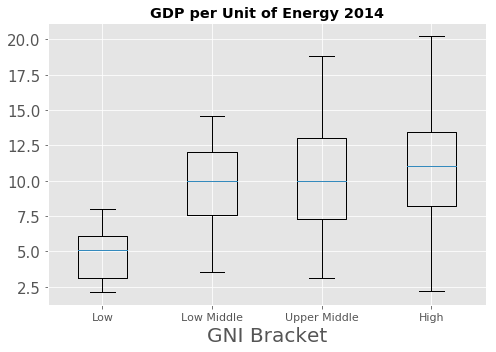

In [40]:
'''Create a single boxplot for a specific power code and year'''

income_boxplot(df_data,pwr_codes[-1],'2014')

In [54]:
'''Set about rearraging the data in rows to columns for a correlation map'''

def create_column_from_row(df, select_col, select_specific, year):
    '''create a list given a specific criteria so it can be turned from a row to a column
    input: dataframe, column, criteria, year
    output: a list of values for the given year
    '''
    lst_new = df[df[select_col] == select_specific]
    return lst_new[str(year)]

In [57]:
'''Create all columns for the correlation map dataframe'''
# names of the countries
country_names = df_data['Country Name'].unique()
# per capita income for reference
df_GDP_PPP = df_data[df_data['Indicator Name'] == 'GDP per capita, PPP (current international $)']
GDP_PPP_col = df_GDP_PPP['2014']
# values for power consumption/production criteria
columns = []
for name in pwr_names:
    columns.append(create_column_from_row(df_data,'Indicator Name', name,'2014'))
pwr_1,pwr_2,pwr_3,pwr_4,pwr_5,pwr_6,pwr_7,pwr_8 = columns 

In [58]:
'''Create a dataframe'''

df_corr_matrix = pd.DataFrame({'Country Name': list(country_names),
                              'GDP per capita, PPP': list(GDP_PPP_col),
                              'Access to clean fuels or cooking': list(pwr_1),
                              'Access to electricity': list(pwr_2),
                              'Electric power consumption': list(pwr_3),
                              'Electricity production from renewable sources': list(pwr_4),
                              'Energy intensity level of primary energy': list(pwr_5),
                              'Energy use (kg of oil equivalent per capita)': list(pwr_6),
                              'GDP per unit of energy use': list(pwr_7),
                              'Electricity production from nuclear sources': list(pwr_8)})

df_corr = df_corr_matrix.dropna()

In [59]:
'''create column names'''

varLabels = ['GDP per capita, PPP',
            'Access to clean fuels or cooking',
            'Access to electricity',
            'Electric power consumption',
            'Electricity production from renewable sources',
            'Energy intensity level of primary energy',
            'Energy use (kg of oil equivalent per capita)',
            'GDP per unit of energy use',
            'Electricity production from nuclear sources']

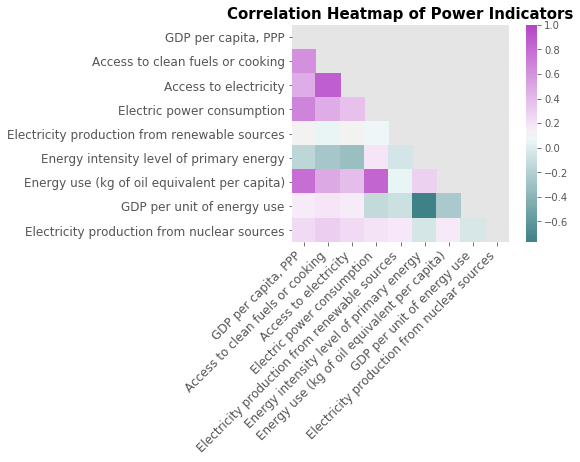

In [60]:
'''Create a correlational heatmap'''

mask = np.triu(df_corr.corr())
ax = sns.heatmap(df_corr.corr(),yticklabels=True, cmap=sns.diverging_palette(200,300, n=200),square=True, mask=mask)
ax.set_xticklabels(varLabels, rotation=45, ha='right', fontsize=12) 
ax.set_yticklabels(varLabels, fontsize=12)
ax.set_title('Correlation Heatmap of Power Indicators', fontsize = 15, fontweight='bold')
b, t = plt.ylim()
# b += 0.5
# t -= 0.5
# plt.ylim(b,t)
# plt.show()
# ax.set_ylim(b+0.5, t-0.5)
plt.show()


# corr = df.corr()
# # create mask to only show lower triangular matrix
# mask = np.triu(corr)

# fig, ax = plt.subplots(figsize=(16, 16))

# sns.heatmap(corr, annot=True, fmt='.3f', square=True, mask=mask)

# sns.heatmap(corr, annot=True, fmt='.3f', square=True, mask=mask)
# ax.set_title('Correlation Heatmap of Churn Data')